In [23]:
import pandas as pd
df=pd.read_csv('Lab_5_India_Statewise_Power_Infrastructure_Data_RBI.csv')

## Preliminary Data Cleaning

In [24]:
print("Column Entries:\n",df.columns)

Column Entries:
 Index(['State/Union Territory', 'Year', 'Power_Requirement_Net_Crore_Units',
       'Availability_Of_Power_Net_Crore_Units',
       'Availability_Of_Power_Per_Capita_kiloWatt-Hour',
       'Installed_Power_Capacity_MegaWatt'],
      dtype='object')


In [25]:
print("Missing values \n",df.isnull().sum())

Missing values 
 State/Union Territory                             0
Year                                              0
Power_Requirement_Net_Crore_Units                 0
Availability_Of_Power_Net_Crore_Units             0
Availability_Of_Power_Per_Capita_kiloWatt-Hour    0
Installed_Power_Capacity_MegaWatt                 0
dtype: int64


In [26]:
print("Duplicate entries:\n",df.duplicated().sum())

Duplicate entries:
 0


In [27]:
numeric_columns = ['Power_Requirement_Net_Crore_Units', 'Availability_Of_Power_Net_Crore_Units', 
                   'Availability_Of_Power_Per_Capita_kiloWatt-Hour', 'Installed_Power_Capacity_MegaWatt']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

## Statistical Analysis

In [28]:
mean_power_req = df[df['Year'] == '2020-21']['Power_Requirement_Net_Crore_Units'].mean()
print("Mean Power Requirement (2020-2021):", mean_power_req)

Mean Power Requirement (2020-2021): 3484.9166666666665


In [29]:
tn_data = df[(df['State/Union Territory'] == 'Maharashtra') & (df['Year'].between('2004', '2021'))]
mean_installed_capacity_tn = tn_data['Installed_Power_Capacity_MegaWatt'].mean()
print("Mean Installed Capacity for Maharastra:", mean_installed_capacity_tn)

Mean Installed Capacity for Maharastra: 30576.058823529413


In [30]:
def my_mean(data):
    if len(data)==0:
        return 
    total = sum(data)
    return total / len(data)

In [31]:
data_2015_2016 = df[df['Year'] == '2015-16']['Availability_Of_Power_Per_Capita_kiloWatt-Hour']
mean_custom = my_mean(data_2015_2016.dropna())
print("Custom Mean Availability of Power Per Capita (2015-2016):", mean_custom)

Custom Mean Availability of Power Per Capita (2015-2016): 1690.5555555555552


In [32]:
up_data = df[(df['State/Union Territory'] == 'Gujarat') & (df['Year'].between('2010', '2015'))]
mean_availability_up = my_mean(up_data['Availability_Of_Power_Net_Crore_Units'].dropna())
print("Custom Mean Power Availability for Gujarat (2010-2015):", mean_availability_up)

Custom Mean Power Availability for Gujarat (2010-2015): 8403.4


In [33]:
median_ins_power = df[df['Year']  == '2018-19']['Installed_Power_Capacity_MegaWatt'].median()
print("Median of Installed Power Capacity (2018-2019):", median_ins_power)

Median of Installed Power Capacity (2018-2019): 3735.5


In [34]:
median_ins_power = df[df['Year'] == '2009-10']['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].median()
print("Median of Power Per Capita kiloWatt-Hour (2009-2010):", median_ins_power)

Median of Power Per Capita kiloWatt-Hour (2009-2010): 608.7


In [35]:
def my_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    middle = n // 2
    if n % 2 == 0:
        return (sorted_data[middle - 1] + sorted_data[middle]) / 2
    else:
        return sorted_data[middle]

In [36]:
data_2012_2013 = df[df['Year'] == '2012-13']['Power_Requirement_Net_Crore_Units'].dropna()
median_custom = my_median(data_2012_2013)
print("Custom Median Power Requirement (2012-2013):", median_custom)

Custom Median Power Requirement (2012-2013): 1016.0


In [37]:
tn_data = df[(df['State/Union Territory'] == 'Tamil Nadu') & (df['Year'].between('2005', '2010'))]
median_avail_tn = my_median(tn_data['Availability_Of_Power_Net_Crore_Units'].dropna())
print("Custom Median Power Availability for Tamil Nadu (2005-2010):", median_avail_tn)

Custom Median Power Availability for Tamil Nadu (2005-2010): 6395.0


In [38]:
mode_power_req_2017_2018 = df[df['Year'] == '2017-18']['Power_Requirement_Net_Crore_Units'].mode()[0]
print("Mode Power Requirement (2017-2018):", mode_power_req_2017_2018)

Mode Power Requirement (2017-2018): 80.0


In [39]:
karnataka_data = df[df['State/Union Territory'] == 'Karnataka']
mode_avail_power_karnataka = karnataka_data['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].mode()[0]
print("Mode Power Per Capita for Karnataka (2004-2021):", mode_avail_power_karnataka)

Mode Power Per Capita for Karnataka (2004-2021): 637.4


In [40]:
def my_mode(data):
    data_list = list(data)
    return max(set(data_list), key=data_list.count)

In [41]:
data_2014_2015 = df[df['Year'] == '2014-15']['Installed_Power_Capacity_MegaWatt'].dropna()
mode_custom = my_mode(data_2014_2015)
print("Custom Mode Installed Power Capacity (2014-2015):", mode_custom)

Custom Mode Installed Power Capacity (2014-2015): 131.0


In [45]:
wb_data = df[(df['State/Union Territory'] == 'West Bengal') & (df['Year'].between('2008', '2012'))]
mode_power_req_wb = my_mode(wb_data['Power_Requirement_Net_Crore_Units'].dropna())
print("Custom Mode Power Requirement for West Bengal (2008-2012):", mode_power_req_wb)

Custom Mode Power Requirement for West Bengal (2008-2012): 3648.0


In [46]:
std_avail_power_2019_2020 = df[df['Year'] == '2019-20']['Availability_Of_Power_Net_Crore_Units'].std()
print("Standard Deviation of Power Availability (2019-2020):", std_avail_power_2019_2020)

Standard Deviation of Power Availability (2019-2020): 4150.602560577562


In [47]:
up_data = df[(df['State/Union Territory'] == 'Uttar Pradesh') & (df['Year'].between('2006', '2016'))]
std_installed_capacity_up = up_data['Installed_Power_Capacity_MegaWatt'].std()
print("Standard Deviation Installed Capacity for UP (2006-2016):", std_installed_capacity_up)


Standard Deviation Installed Capacity for UP (2006-2016): 3225.8229337643443


In [48]:
import math

def my_std(data):
    mean_val = my_mean(data)
    variance = sum((x - mean_val) ** 2 for x in data) / len(data)
    return math.sqrt(variance)

In [49]:
data_2016_2017 = df[df['Year'] == '2016-17']['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].dropna()
std_custom = my_std(data_2016_2017)
print("Custom Standard Deviation Power Per Capita (2016-2017):", std_custom)

Custom Standard Deviation Power Per Capita (2016-2017): 3107.1073844325147


In [50]:
rajasthan_data = df[(df['State/Union Territory'] == 'Rajasthan') & (df['Year'].between('2007', '2013'))]
std_power_req_rj = my_std(rajasthan_data['Power_Requirement_Net_Crore_Units'].dropna())
print("Custom Standard Deviation Power Requirement for Rajasthan (2007-2013):", std_power_req_rj)

Custom Standard Deviation Power Requirement for Rajasthan (2007-2013): 675.4489042275679


In [51]:
var_power_req_2020_2021 = df[df['Year'] == '2020-21']['Power_Requirement_Net_Crore_Units'].var()
print("Variance of Power Requirement (2020-2021):", var_power_req_2020_2021)

Variance of Power Requirement (2020-2021): 16809599.90714286


In [52]:
kerala_data = df[(df['State/Union Territory'] == 'Kerala') & (df['Year'].between('2005', '2015'))]
var_installed_capacity_kerala = kerala_data['Installed_Power_Capacity_MegaWatt'].var()
print("Variance Installed Capacity for Kerala (2005-2015):", var_installed_capacity_kerala)

Variance Installed Capacity for Kerala (2005-2015): 47175.34444444444


In [53]:
def my_variance(data):
    mean_val = my_mean(data)
    return sum((x - mean_val) ** 2 for x in data) / len(data)


In [54]:
data_2010_2011 = df[df['Year'] == '2010-11']['Availability_Of_Power_Net_Crore_Units'].dropna()
var_custom = my_variance(data_2010_2011)
print("Custom Variance Power Availability (2010-2011):", var_custom)

Custom Variance Power Availability (2010-2011): 7471725.500000002


In [55]:
odisha_data = df[(df['State/Union Territory'] == 'Odisha') & (df['Year'].between('2012', '2020'))]
var_avail_power_odisha = my_variance(odisha_data['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].dropna())
print("Custom Variance Power Per Capita for Odisha (2012-2020):", var_avail_power_odisha)

Custom Variance Power Per Capita for Odisha (2012-2020): 3207.2923437500003


In [56]:
q1 = df[df['Year'] == '2019-20']['Power_Requirement_Net_Crore_Units'].quantile(0.25)
q3 = df[df['Year'] == '2019-20']['Power_Requirement_Net_Crore_Units'].quantile(0.75)
iqr_power_req_2019_2020 = q3 - q1
print("IQR Power Requirement (2019-2020):", iqr_power_req_2019_2020)

IQR Power Requirement (2019-2020): 5693.25


In [57]:
bihar_data = df[(df['State/Union Territory'] == 'Bihar') & (df['Year'].between('2010', '2020'))]
q1_bihar = bihar_data['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].quantile(0.25)
q3_bihar = bihar_data['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].quantile(0.75)
iqr_avail_power_bihar = q3_bihar - q1_bihar
print("IQR Power Per Capita for Bihar (2010-2020):", iqr_avail_power_bihar)

IQR Power Per Capita for Bihar (2010-2020): 119.85


In [62]:
def my_iqr(data):
    sorted_data = sorted(data)
    q1 = sorted_data[int(len(sorted_data) * 0.25)]
    q3 = sorted_data[int(len(sorted_data) * 0.75)]
    return q3 - q1

In [63]:
data_2015_2016_iqr = df[df['Year'] == '2015-16']['Installed_Power_Capacity_MegaWatt'].dropna()
iqr_custom = my_iqr(data_2015_2016_iqr)
print("Custom IQR Installed Power Capacity (2015-2016):", iqr_custom)

Custom IQR Installed Power Capacity (2015-2016): 14492.0


In [65]:
mp_data = df[(df['State/Union Territory'] == 'Madhya Pradesh') & (df['Year'].between('2008', '2018'))]
iqr_avail_power_mp = my_iqr(mp_data['Availability_Of_Power_Net_Crore_Units'].dropna())
print("Custom IQR Power Availability for Madhya Pradesh (2008-2018):", iqr_avail_power_mp)

Custom IQR Power Availability for Madhya Pradesh (2008-2018): 2374.0


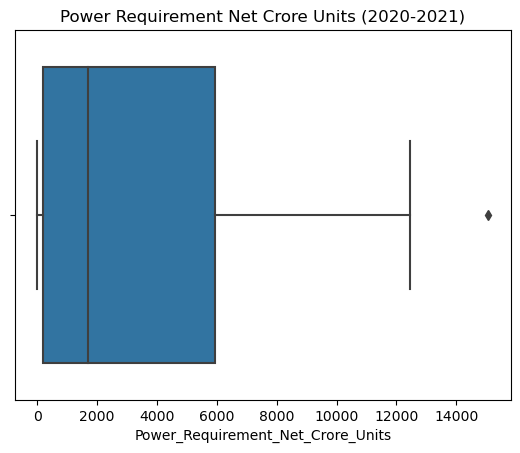

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[df['Year'] == '2020-21'], x='Power_Requirement_Net_Crore_Units')
plt.title('Power Requirement Net Crore Units (2020-2021)')
plt.show()

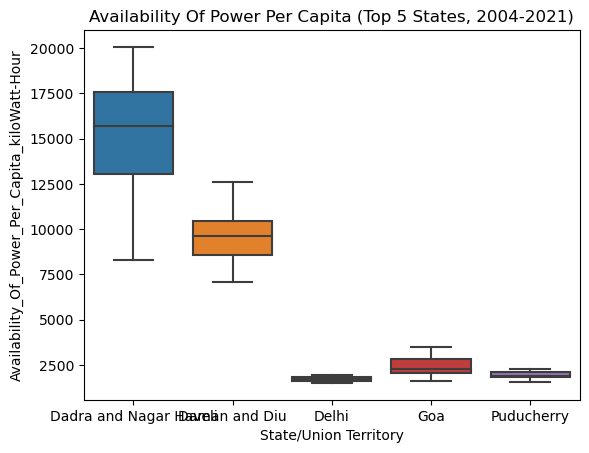

In [67]:
top_5_states = df.groupby('State/Union Territory')['Availability_Of_Power_Per_Capita_kiloWatt-Hour'].mean().nlargest(5).index
top_5_data = df[df['State/Union Territory'].isin(top_5_states)]
sns.boxplot(x='State/Union Territory', y='Availability_Of_Power_Per_Capita_kiloWatt-Hour', data=top_5_data)
plt.title('Availability Of Power Per Capita (Top 5 States, 2004-2021)')
plt.show()

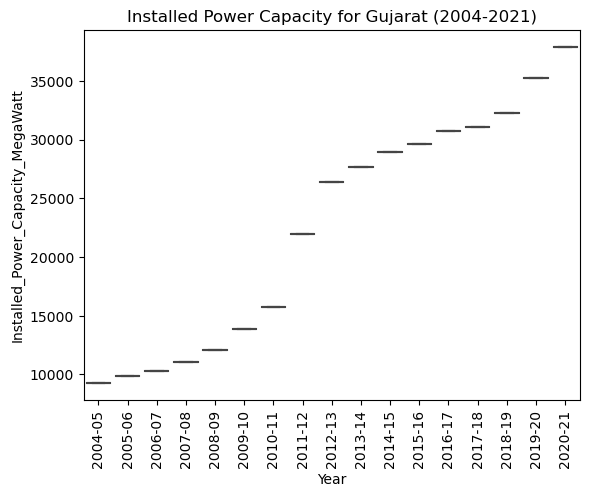

In [68]:
gujarat_data = df[df['State/Union Territory'] == 'Gujarat']
sns.boxplot(x='Year', y='Installed_Power_Capacity_MegaWatt', data=gujarat_data)
plt.title('Installed Power Capacity for Gujarat (2004-2021)')
plt.xticks(rotation=90)
plt.show()